<center>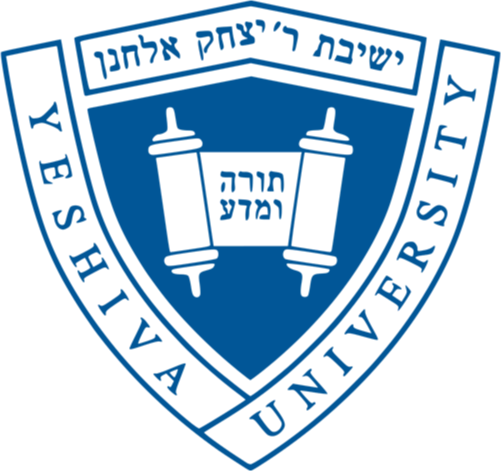</center>

<h1 style='text-align: center;'>Katz School of Science and Health</h1>
<h1 style='text-align: center;'>AIM 5003 Numerical Methods</h1>
<p>
<h2 style='text-align: center;'>Project 3</h1>
<h2 style='text-align: center;'>Real-time Face Recognition using the SVD</h1>
<br><br>

<h3 style='text-align: center;'>Radek Jan Holik</h3>
<h3 style='text-align: center;'>Sana Omar</h3>
<br>
<br>

# <a name="Contents">Table of Contents</a>
- [1 Loading Data](#Section-1)
    - [1.1 Import the Necessary Libraries](#Section-11)
    - [1.2 Data Links](#Section-12)
    - [1.3 Loading Addresses of All Images](#Section-13)
    - [1.4 Load Image Files](#Section-14)
    - [1.5 Size of One Image](#Section-15)
    - [1.6 Sample of Images](#Section-16)
<p>

- [2 Data Set](#Section-2)
    - [2.1 Definition of 'img2vec'](#Section-21)
    - [2.2 Definition of 'vec2img'](#Section-22)
    - [2.3 Definition of 'img2mat'](#Section-23)
    - [2.4 Conversion of all Faces to Vectors](#Section-24)
    - [2.5 Mean Face $\bar{f}$](#Section-25)
<p>

- [3 Division of the Data Set](#Section-3)
    - [3.1 Definition of 'shuffle'](#Section-31)
    - [3.2 Shuffling the Original Data Set](#Section-32)
    - [3.3 Dataset Shuffling Check](#Section-33)
    - [3.4 Dividing Ratio](#Section-34)
    - [3.5 Two Disjoint Sets $F$ and $Q$](#Section-35)
<p>

- [4 Face Recognition in the Original Image Space](#Section-4)
    - [4.1 Definition of 'query'](#Section-41)
    - [4.2 Definition of 'recognition'](#Section-42)
    - [4.3 One Face Recognition](#Section-43)
    - [4.4 Several Face Recognitions](#Section-44)
<p>
    
- [5 Recognition of each Image in $Q$](#Section-5)
    - [5.1 Original Ratio 75:25 between $F$ and $Q$](#Section-51)
    - [5.2 Ration 80:20 between $F$ and $Q$](#Section-52)
    - [5.3 Ration 60:40 between $F$ and $Q$](#Section-53)
    - [5.4 Comparison of Individual Ratios](#Section-54)
<p>

 - [6 Singular Value Decomposition (SVD)](#Section-6)
    - [6.1 Normalization of the Data Set](#Section-61)
    - [6.2 Shuffling the Original Data Set](#Section-62)
    - [6.3 Dividing Ratio](#Section-63)
    - [6.4 Original Ratio between F and Q](#Section-64)
    - [6.5 SVD Calculation](#Section-65)
    - [6.6 Sanity Check on Dimensions](#Section-66)
    - [6.7 Eigen Faces](#Section-67)
<p>

- [7 Selection of the Dimension $p$](#Section-7)
    - [7.1 Distribution of Singular Values](#Section-71)
    - [7.2 Value of $p$](#Section-72)
<p>

- [8 Projection on the Reduced Face Space](#Section-8)
    - [8.1 Base-Face](#Section-81)
    - [8.2 Projection of the Database $F$](#Section-82)
    - [8.3 Projection of the Query Set $Q$](#Section-83)
    - [8.4 Recognition of the Reduced $Q$](#Section-84)
    - [8.5 One Face Recognition of the reduced $Q$](#Section-85)
    - [8.6 Accuracy Based on $p$](#Section-86)

<p>

- [9 Extra Activities](#Section-9)
    - [9.1 Personal Implementation of SVD](#Section-91)
    - [9.2 Average Face of Each Individual in $F$](#Section-92)

<p>

- [10 Conclusion](#Section-10)

<p>

- [References](#Section-8)

# <a name="Section-1">1 Loading Data</a>
[top](#Contents)

## <a name="Section-11">1.1 Import the Necessary Libraries</a>

In [1]:
# Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

from bs4 import BeautifulSoup
import requests
import re
import PIL
import urllib
import dask.array as da

import time
from datetime import timedelta

import tracemalloc

# Setup printing numbers in scientific notation with a high accuracy
np.set_printoptions(suppress = False)
np.set_printoptions(precision = 16)

import warnings
warnings.filterwarnings("ignore")

## <a name="Section-12">1.2 Data Links</a>

#### __We uploaded the data set to our repository on GitHub so that we can have access to it and reproduce our code anywhere with an Internet connection.__

In [2]:
pathUrl = r"https://github.com/rjholik/AIM-5003-Numerical-Methods/tree/main/Project03/yaledatabase"
filePath = r"https://raw.githubusercontent.com/rjholik/AIM-5003-Numerical-Methods/main/Project03/yaledatabase"

## <a name="Section-13">1.3 Loading Addresses of All Images</a>

In [3]:
def getNames(url):
    '''
        Return a list of file names from the path way.
    '''
    my_regex = re.compile("\w\d+[\.]\w")
    
    
    response = requests.get(url)
    if response.ok:
        responseText = response.text
    else:
        return response.raise_for_status()
    
    soup = BeautifulSoup(responseText, 'html.parser')
    
    parent = [node for node in soup.find_all(text = my_regex)]
    
    return parent

In [4]:
files = getNames(pathUrl)

## <a name="Section-14">1.4 Load Image Files</a>

In [5]:
def getGifFiles(url, files):
    '''
        Clean Data (load, normalize, tokenize, remove punctuation, split, remove stopwords)
    '''
    
    myGifs = []
    
    for file in files:
        path = url + "/" + file
        
        # Load one gif file
        gif = np.array(PIL.Image.open(urllib.request.urlopen(path)))
        
        myGifs.append(gif)
        
    return myGifs

In [6]:
gifs = getGifFiles(filePath, files)

N = len(gifs)
print(f"Image count : N = {N}")

Image count : N = 165


## <a name="Section-15">1.5 Size of One Image</a>

In [7]:
shapeImage = gifs[0].shape
print(f"The size of one picture : {shapeImage}")

The size of one picture : (243, 320)


## <a name="Section-16">1.6 Sample of Images</a>

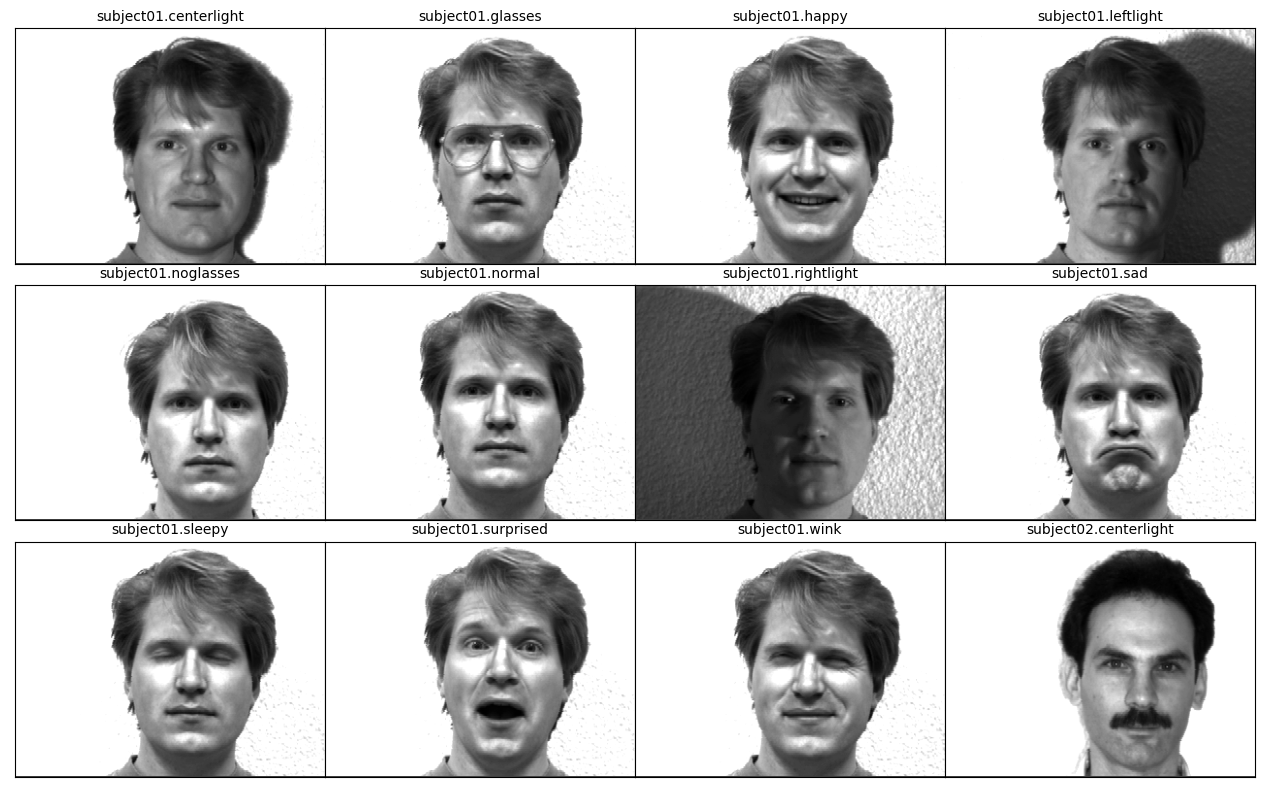

In [8]:
plt.figure(figsize = (16, 10))
for img in range(0, 12):
    plt.subplot(3, 4, img + 1)
    plt.imshow(gifs[img], cmap = "gray")
    plt.title(files[img], fontsize = 10)
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(wspace=0, hspace=0.0)

# <a name="Section-2">2 Data Set</a>
[top](#Contents)

## <a name="Section-21">2.1 Definition of 'img2vec'</a>

In [9]:
def img2vec(face):
    M = face.shape[0] * face.shape[1]
    vec = face.reshape(M, 1)

    return vec

## <a name="Section-22">2.2 Definition of 'vec2img'</a>

In [10]:
def vec2img(image, dimension = (243, 320)):
    return image.reshape(dimension)

## <a name="Section-23">2.3 Definition of 'img2mat'</a>

In [11]:
def img2mat(faces):
    
    for idx, face in enumerate(faces):
        vec = img2vec(face)

        if idx == 0:
            S = vec
        else:
            S = np.concatenate((S, vec), axis=1)

    return S

## <a name="Section-24">2.4 Conversion of all Faces to Vectors</a>

In [12]:
dataSet = img2mat(gifs)

# dataSet dimension
print(f"dataSet : {dataSet.shape}")

dataSet : (77760, 165)


## <a name="Section-25">2.5 Mean Face</a>

In [13]:
fBar = (dataSet.sum(axis = 1) / N).reshape(dataSet.shape[0], 1)

# fBar dimension
print(f"fBar : {fBar.shape}")

fBar : (77760, 1)


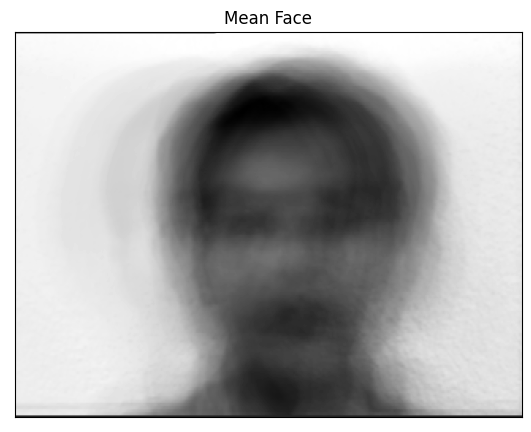

In [14]:
plt.figure(figsize = (9, 5))
plt.imshow(vec2img(fBar), cmap = "gray")
plt.title('Mean Face')
plt.xticks([])
plt.yticks([])
plt.show()

#### __Initially, in this part, we normalized our dataset, that is, we subtracted the mean face from each face vector. Based on the recommendation, we moved this process to the SVD section.__

# <a name="Section-3">3 Division of the Data Set</a>
[top](#Contents)

## <a name="Section-31">3.1 Definition of 'shuffle'</a>

In [15]:
def shuffle(gifs, files):
    np.random.seed(2022)
    
    #Shuffle two lists with same order
    temp = list(zip(gifs, files))

    # 5 times shuffling
    for _ in range(5):
        np.random.shuffle(temp)

    res1, res2 = zip(*temp)
    gifs, files = list(res1), list(res2)

    return np.array(gifs).T, files

## <a name="Section-32">3.2 Shuffling the Original Data Set</a>

#### __To avoid an uneven distribution of suspects between individual sets, we "precisely" shuffle the data set.__

In [16]:
A_shuffled, files_shuffled = shuffle([dataSet[:,idx] for idx in range(dataSet.shape[1])], files)

## <a name="Section-33">3.3 Dataset Shuffling Check</a>

#### __The following checking sample of the suspects from the beginning of the data set shows that no single suspect is recurring in the series or more frequent than the other suspects.__

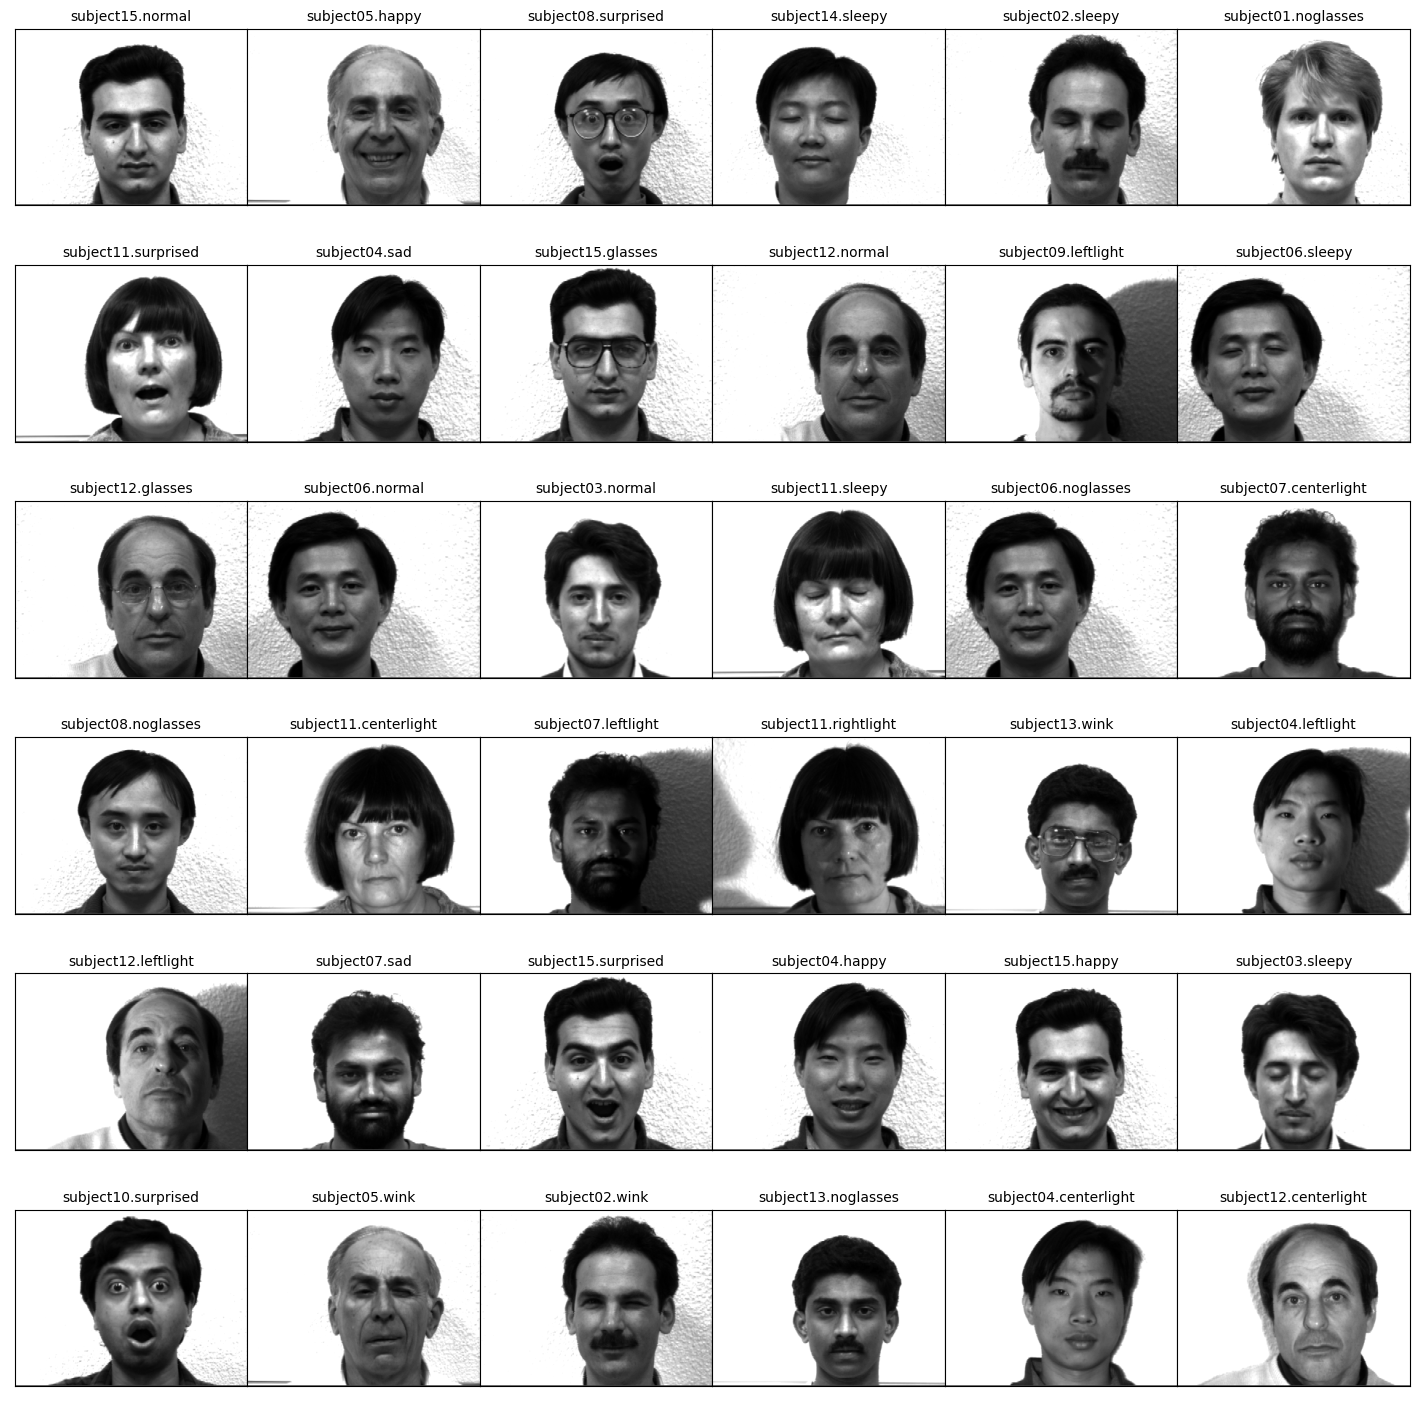

In [17]:
plt.figure(figsize = (18, 18))
for img in range(0, 36):
    plt.subplot(6, 6, img + 1)
    plt.imshow(vec2img(A_shuffled[:,img]), cmap = "gray")
    plt.title(files_shuffled[img], fontsize = 10)
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(wspace = 0, hspace = 0.15)

## <a name="Section-34">3.4 Dividing Ratio</a>

#### __We decided to divide the data set into two disjoint sets in the ratio 75:25. This means that the size of the training set is 123.__

In [18]:
# Select ratio
ratio = 0.75

totalColumns = A_shuffled.shape[1]
trainSize = int(totalColumns * ratio)
print(f"F size : {trainSize}")

F size : 123


## <a name="Section-35">3.5 Two Disjoint Sets F and Q</a>

In [19]:
# Database F
F = F_original = A_shuffled[:,:trainSize]
F_labels = files_shuffled[:trainSize]

# Only individual names without a postfix in the lables of F are left
F_original_labels_subjects = []
for sub in F_labels:
    F_original_labels_subjects.append(sub[:9])
F_labels = F_original_labels_subjects


# Query set Q
Q = Q_original = A_shuffled[:,trainSize:]
Q_labels = Q_original_labels = files_shuffled[trainSize:]

In [20]:
# F and Q dimensions
print(f"F : {F.shape}")
print(f"Q : {Q.shape}")

F : (77760, 123)
Q : (77760, 42)


# <a name="Section-4">4 Face Recognition in the Original Image Space</a>
[top](#Contents)

## <a name="Section-41">4.1 Definition of 'query'</a>

In [21]:
def query(face, database):
    '''
        The 1 Nearest-Neighbor (1-N-N) Classifier
        - First, calculate the L2 norm of the distance between the quarry face and all faces in F.
        - Choose the ID of the face from F that has the smallest distance to the quarry face.
    '''
    bigEpsilon = np.linalg.norm(np.multiply(face.reshape(face.shape[0], 1), np.ones(database.shape)) - database, axis = 0)
    minimumValueIndex = np.argmin(bigEpsilon)

    id = F_labels[minimumValueIndex][:9]
    return id

## <a name="Section-42">4.2 Definition of 'recognition'</a>

In [22]:
def recognition(querySetQ, DatabaseF, pictures = True, print_report = True):
    '''
        This function receives a batch of images and
        then calls the 'query' function which sequentially predicts image by image.
    '''
    # Only individual names without a postfix in the lables of F are left
    files_subjects = []
    for sub in files:
        files_subjects.append(sub[:9])

    outcome = 0
    numberImages = querySetQ.shape[1]

    for q in range(0, querySetQ.shape[1]):

        prediction = query(querySetQ[:,q], DatabaseF)
        # print(f"prediction = {prediction}")

        predictedPositionOriginal = files_subjects.index(prediction)
        # print(f"pQ_labels[q] = {Q_labels[q]}")
        
        positionQinOriginal = files.index(Q_labels[q])

        titleQ = Q_labels[q]
        titlePredict = files_subjects[predictedPositionOriginal]

        if titleQ[:9] == titlePredict[:9]:
            # print(f"{titleQ[:9]} == {titlePredict[:9]}")
            outcome += 1
        
        if pictures == True:
            # Plot
            plt.figure(figsize = (7, 15))

            plt.subplot(1, 2, 1)
            plt.imshow(gifs[positionQinOriginal], cmap = "gray")
            plt.title(titleQ  + " (Queried)", fontsize = 10)
            plt.xticks([])
            plt.yticks([])

            plt.subplot(1, 2, 2)
            plt.imshow(gifs[predictedPositionOriginal], cmap = "gray")
            plt.title(titlePredict + " (Predicted)", fontsize = 10)
            plt.xticks([])
            plt.yticks([])
            plt.subplots_adjust(wspace = 0)
                
            plt.show()

    if print_report == True:
        print(f"Number of Queried Pictures : {numberImages}")
        print(f"Number of Matches : {outcome}")
        print(f"Subject Accuracy : {np.round(outcome / numberImages * 100, 2)}%")
    else:
        return outcome / numberImages * 100

## <a name="Section-43">4.3 One Face Recognition</a>

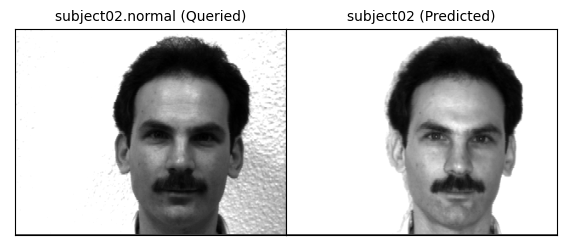

Number of Queried Pictures : 1
Number of Matches : 1
Subject Accuracy : 100.0%
The closest match in the database F is subject02.

Maximum Memory Usage (RAM): 146.0195426940918 MB
Execution time: 0:00:00.167578 [hh:mm:ss]


In [23]:
numberImage = 1 # max. faces : 42
onePicture = Q[:,0:numberImage].reshape(Q[:,0:numberImage].shape[0], numberImage)

starting_time = time.time()

# starting the monitoring
tracemalloc.clear_traces()
tracemalloc.start()

id = query(onePicture, F)
recognition(onePicture, F)
print(f"The closest match in the database F is {id}.")

# displaying the memory
print(f"\nMaximum Memory Usage (RAM): {tracemalloc.get_traced_memory()[1]/ (1024 * 1024)} MB")
tracemalloc.clear_traces()

print(f'Execution time: {timedelta(seconds = (time.time() - starting_time)*0.5)} [hh:mm:ss]')

## <a name="Section-44">4.4 Several Face Recognitions</a>

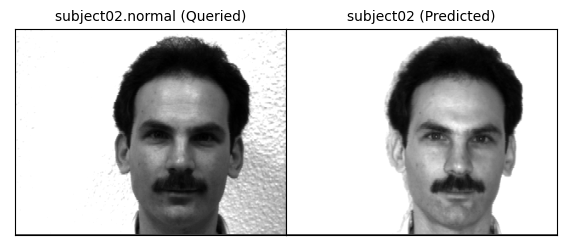

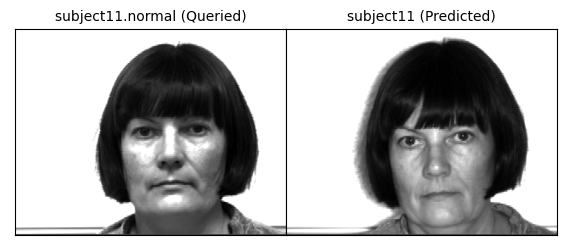

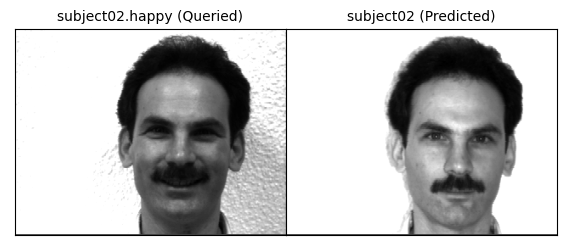

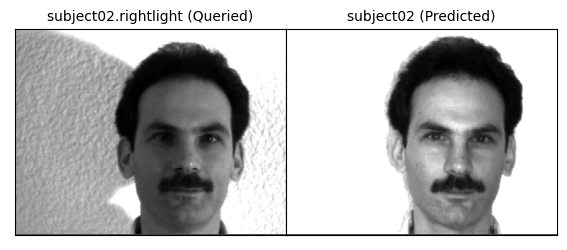

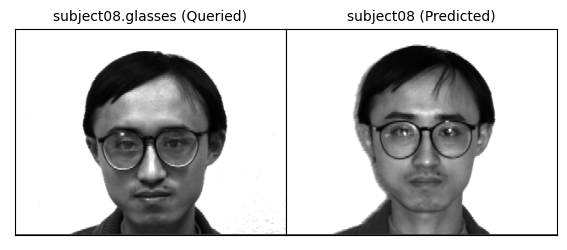

Number of Queried Pictures : 5
Number of Matches : 5
Subject Accuracy : 100.0%

Maximum Memory Usage (RAM): 148.440505027771 MB
Execution time: 0:00:01.297646 [hh:mm:ss]


In [24]:
numberImage = 5 # max. faces : 42

starting_time = time.time()

# starting the monitoring
tracemalloc.clear_traces()
tracemalloc.start()

recognition(Q[:,0:numberImage].reshape(Q[:,0:numberImage].shape[0], numberImage), F)

# displaying the memory
print(f"\nMaximum Memory Usage (RAM): {tracemalloc.get_traced_memory()[1]/ (1024 * 1024)} MB")
tracemalloc.clear_traces()

print(f'Execution time: {timedelta(seconds = time.time() - starting_time)} [hh:mm:ss]')

# <a name="Section-5">5 Recognition of each Image in Q</a>
[top](#Contents)

## <a name="Section-51">5.1 Original Ratio 75:25 between F and Q</a>

In [25]:
# Select ratio
ratio = 0.75

totalColumns = A_shuffled.shape[1]
trainSize = int(totalColumns * ratio)
print(f"F size : {trainSize}")

F size : 123


In [26]:
# Database F
F = A_shuffled[:,:trainSize]
F_labels = files_shuffled[:trainSize]

# Query set Q
Q = A_shuffled[:,trainSize:]
Q_labels = files_shuffled[trainSize:]

In [27]:
starting_time = time.time()

# starting the monitoring
tracemalloc.clear_traces()
tracemalloc.start()

recognition(Q, F, pictures = False)

# displaying the memory
print(f"\nMaximum Memory Usage (RAM): {tracemalloc.get_traced_memory()[1]/ (1024 * 1024)} MB")
tracemalloc.clear_traces()

print(f'Execution time: {timedelta(seconds = time.time() - starting_time)} [hh:mm:ss]')

Number of Queried Pictures : 42
Number of Matches : 35
Subject Accuracy : 83.33%

Maximum Memory Usage (RAM): 146.01976203918457 MB
Execution time: 0:00:03.190405 [hh:mm:ss]


## <a name="Section-52">5.2 Ration 80:20 between F and Q</a>

In [28]:
# Select ratio
ratio = 0.8

totalColumns = A_shuffled.shape[1]
trainSize = int(totalColumns * ratio)
print(f"F size : {trainSize}")

F size : 132


In [29]:
# Database F
F = A_shuffled[:,:trainSize]
F_labels = files_shuffled[:trainSize]

# Query set Q
Q = A_shuffled[:,trainSize:]
Q_labels = files_shuffled[trainSize:]

In [30]:
starting_time = time.time()

# starting the monitoring
tracemalloc.clear_traces()
tracemalloc.start()

recognition(Q, F, pictures = False)

# displaying the memory
print(f"\nMaximum Memory Usage (RAM): {tracemalloc.get_traced_memory()[1]/ (1024 * 1024)} MB")
tracemalloc.clear_traces()

print(f'Execution time: {timedelta(seconds = time.time() - starting_time)} [hh:mm:ss]')

Number of Queried Pictures : 33
Number of Matches : 28
Subject Accuracy : 84.85%

Maximum Memory Usage (RAM): 156.6987247467041 MB
Execution time: 0:00:02.696839 [hh:mm:ss]


## <a name="Section-53">5.3 Ration 60:40 between F and Q</a>

In [31]:
# Select ratio
ratio = 0.6

totalColumns = A_shuffled.shape[1]
trainSize = int(totalColumns * ratio)
print(f"F size : {trainSize}")

F size : 99


In [32]:
# Database F
F = A_shuffled[:,:trainSize]
F_labels = files_shuffled[:trainSize]

# Query set Q
Q = A_shuffled[:,trainSize:]
Q_labels = files_shuffled[trainSize:]

In [33]:
# starting the monitoring
starting_time = time.time()
tracemalloc.clear_traces()
tracemalloc.start()

recognition(Q, F, pictures = False)

# displaying the memory
print(f"\nMaximum Memory Usage (RAM): {tracemalloc.get_traced_memory()[1]/ (1024 * 1024)} MB")
tracemalloc.clear_traces()

print(f'Execution time: {timedelta(seconds = time.time() - starting_time)} [hh:mm:ss]')

Number of Queried Pictures : 66
Number of Matches : 52
Subject Accuracy : 78.79%

Maximum Memory Usage (RAM): 117.54360389709473 MB
Execution time: 0:00:04.207880 [hh:mm:ss]


## <a name="Section-54">5.4 Comparison of Individual Ratios</a>

#### __For individual ratios, it can be clearly observed that with a larger ratio for set F, the prediction is more accurate and vice versa. The prediction accuracy for individual ratios is as follows: 78.79% (60:40), 83.33% (75:25), and 84.85% (80:20).__

# <a name="Section-6">6 Singular Value Decomposition (SVD)</a>
[top](#Contents)

## <a name="Section-61">6.1 Normalization of the Data Set</a>

In [34]:
# Matrix A
A = dataSet - np.multiply(fBar, np.ones(dataSet.shape))

# A dimension
print(f"A : {A.shape}")

A : (77760, 165)


## <a name="Section-62">6.2 Shuffling the Original Data Set</a>

#### __Similar to section 3.2, we shuffle our dataset.__

In [35]:
A_shuffled, files_shuffled = shuffle([A[:,idx] for idx in range(A.shape[1])], files)

## <a name="Section-63">6.3 Dividing Ratio</a>

In [36]:
# Select ratio
ratio = 0.75

totalColumns = A_shuffled.shape[1]
trainSize = int(totalColumns * ratio)
print(f"F size: {trainSize}")

F size: 123


## <a name="Section-64">6.4 Original Ratio between F and Q</a>

In [37]:
# Database F
F = A_shuffled[:,:trainSize]
F_labels = files_shuffled[:trainSize]

# Query set Q
Q = A_shuffled[:,trainSize:]
Q_labels = files_shuffled[trainSize:]
print(f"Database F size : {F.shape}")
print(f"Query set Q size : {Q.shape}")

Database F size : (77760, 123)
Query set Q size : (77760, 42)


## <a name="Section-65">6.5 SVD Calculation</a>

#### __We have decided to calculate the SVD of the $F$ database and not the whole data set including the query set $Q$. The goal of developing this algorithm is to be deployed for use in the real world in real-time. The query set $Q$ is our testing set where we want to get to know the accuracy of new examples that are not occupied in the database $F$.__

#### __We initially used the full NumPy.linalg.svd for SVD calculation. After calling this function, this function immediately started to fill the computer's operating memory (32GB), then the SSD started to work at 100% and after about 5 minutes of calculation, the computer stopped responding to any commands. After researching the scientific article "Facial Recognition with Singular Value Decomposition" (The Golub-Reinsch Algorithm was used), we found that we can use the reduced SVD which does not require a lot of operational memory.__

#### __There is an alternative library called the Dask library. This library has been developed to handle larger matrices with more than 10,000 parameters. This library is very versatile with the support of computer parallelism. For this reason, we chose SVD from the Dask library, specifically its NumPy equivalent called Array. This library computes the reduced SVD of the matrix F approximately in 47 milliseconds compared to NumPy reduced SVD which can compute the same in 935 milliseconds (approx. 20 times slower).__

### Numpy reduced SVD

In [38]:
# starting the monitoring
starting_time = time.time()
tracemalloc.clear_traces()
tracemalloc.start()

U, Sigma, Vt = np.linalg.svd(F, full_matrices=False)

# displaying the memory
print(f"\nMaximum Memory Usage (RAM): {tracemalloc.get_traced_memory()[1] / (1024 * 1024)} MB")
tracemalloc.clear_traces()
print(f'Execution time: {timedelta(seconds = time.time() - starting_time)} [hh:mm:ss]')


Maximum Memory Usage (RAM): 73.1010046005249 MB
Execution time: 0:00:00.908955 [hh:mm:ss]


### Dask reduced SVD

In [39]:
a = da.from_array(F)

# starting the monitoring
starting_time = time.time()
tracemalloc.start()

# u, sigma, vt = da.linalg.svd(a)
u, sigma, vt = da.linalg.svd_compressed(a, F.shape[1])

# displaying the memory
print(f"\nMaximum Memory Usage (RAM): {tracemalloc.get_traced_memory()[1] / (1024 * 1024)} MB")
tracemalloc.clear_traces()
print(f'Execution time: {timedelta(seconds = time.time() - starting_time)} [hh:mm:ss]')


Maximum Memory Usage (RAM): 0.7587575912475586 MB
Execution time: 0:00:00.044763 [hh:mm:ss]


In [40]:
U, Sigma, Vt = np.array(u), np.array(sigma), np.array(vt)

#### __If the NumPy array is used for numerical calculations in the entire program, then using the Dask Library loses all the advantages of speed and efficiency. This is caused by converting the resulting structures into NumPy arrays, which is time-consuming.__

## <a name="Section-66">6.6 Sanity Check on Dimensions</a>

In [41]:
# Sanity check on dimensions
print(f"F: {F.shape}")
print(f"U: {U.shape}")
print(f"Σ: {Sigma.shape}")
print(f"Vᵀ: {Vt.shape}")
print(f"UΣVᵀ: {(U @ np.diag(Sigma) @ Vt).shape}")

F: (77760, 123)
U: (77760, 123)
Σ: (123,)
Vᵀ: (123, 123)
UΣVᵀ: (77760, 123)


## <a name="Section-67">6.7 Eigen Faces</a>

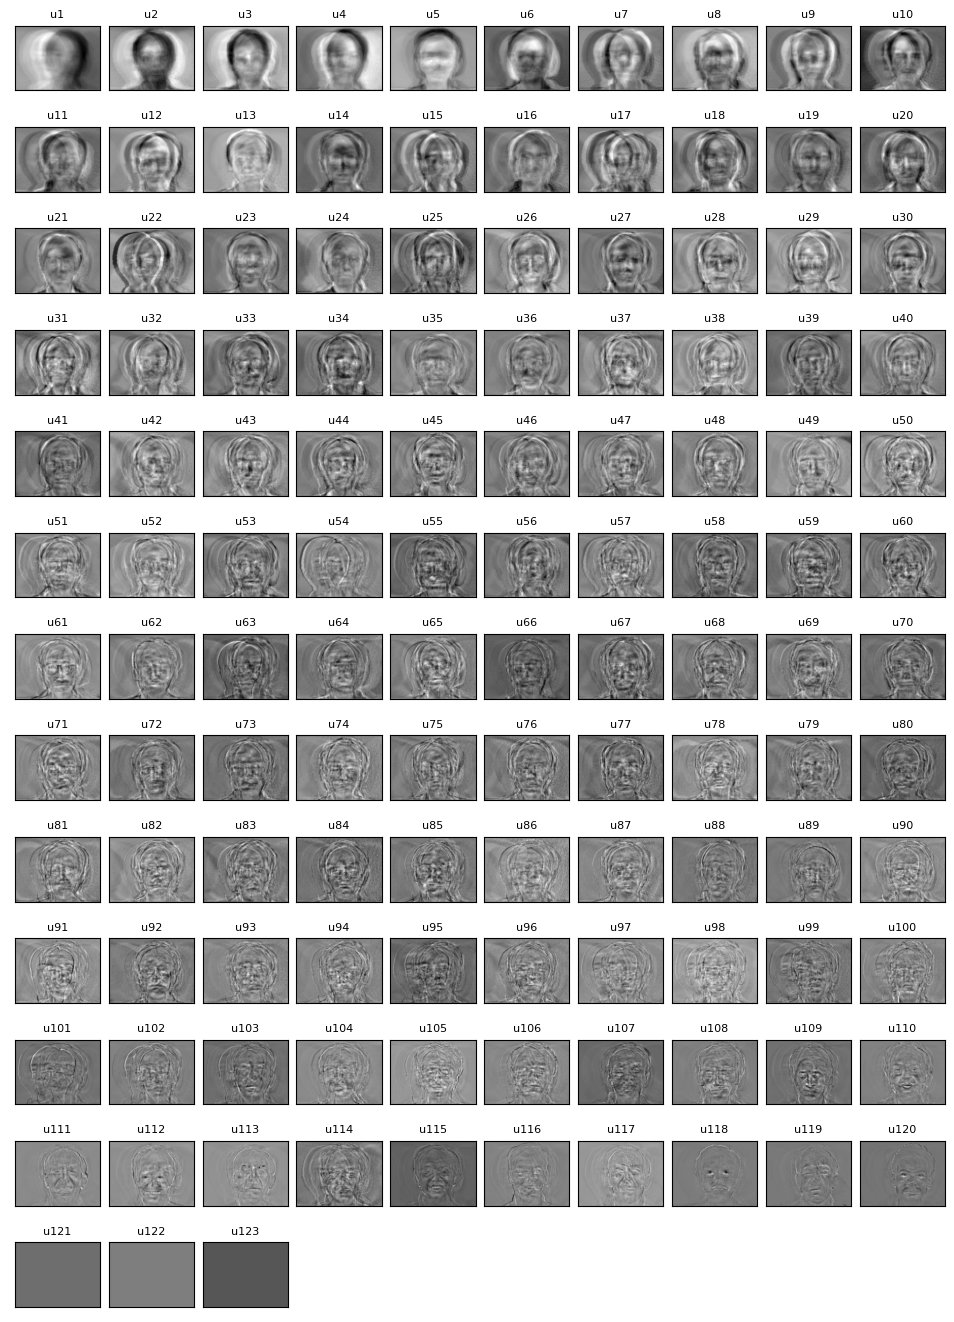

In [42]:
#Plot of "Eigen Faces"
plt.figure(figsize = (12, 17))
for img in range(0, U.shape[1]):
    plt.subplot(13, 10, img + 1)
    plt.imshow(vec2img(U[:,img]), cmap = "gray")
    plt.title(f"u{img+1}", fontsize = 8)
    plt.xticks([]) 
    plt.yticks([])
    plt.subplots_adjust(wspace = 0.1, hspace = 0.1)

# <a name="Section-7">7 Selection of the Dimension p</a>
[top](#Contents)

## <a name="Section-71">7.1 Distribution of Singular Values</a>

#### __Now, we plot the singular values distribution and their cumulative sum or energy, this will aid us to determine where we want to cut down space or reduce dimension:__

In [43]:
p = range(1, len(Sigma)+1)
CumSum = np.cumsum(Sigma)/np.sum(Sigma)

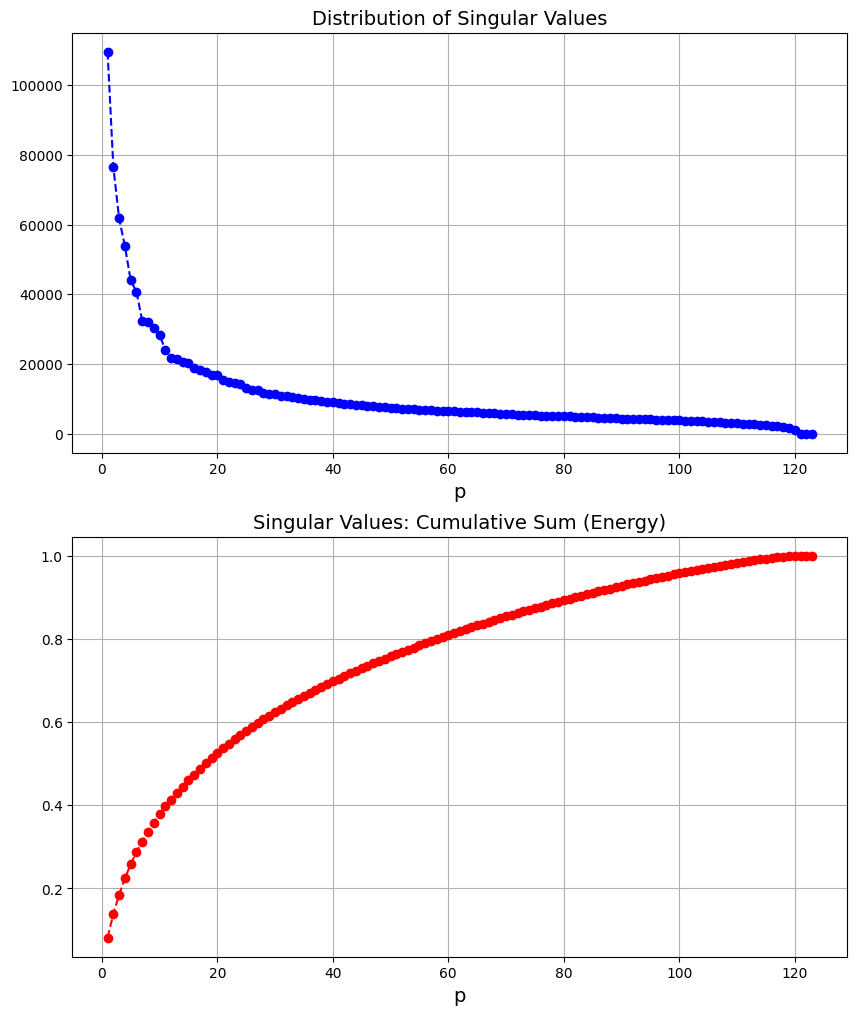

In [44]:
# Plot
plt.figure(figsize = (10, 12))
plt.subplot(2, 1, 1)
plt.plot(p, Sigma, 'bo--')
plt.title(f"Distribution of Singular Values", fontsize = 14)
plt.xlabel('p', fontsize = 14)
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(p, CumSum, 'ro--')
plt.title(f"Singular Values: Cumulative Sum (Energy)", fontsize = 14)
plt.xlabel('p', fontsize = 14)
plt.grid()
plt.show()

## <a name="Section-72">7.2 Value of p</a>

In [45]:
# 50% of the Comulative Sum
p50 = 0.5
index = np.absolute(CumSum - p50).argmin()
selected_dimension_p = p[index]
print(f"p = {selected_dimension_p}")

p = 18


### __We decided to choose $p = 18$ because with this value we have 50% of the cumulative sum (energy) of the singular values.__

# <a name="Section-8">8 Projection on the Reduced Face Space</a>
[top](#Contents)

## <a name="Section-81">8.1 Base-Face</a>

In [46]:
U_base = U[:,:selected_dimension_p]

# Dimensionality check
print(f"U_base : {U_base.shape}")

U_base : (77760, 18)


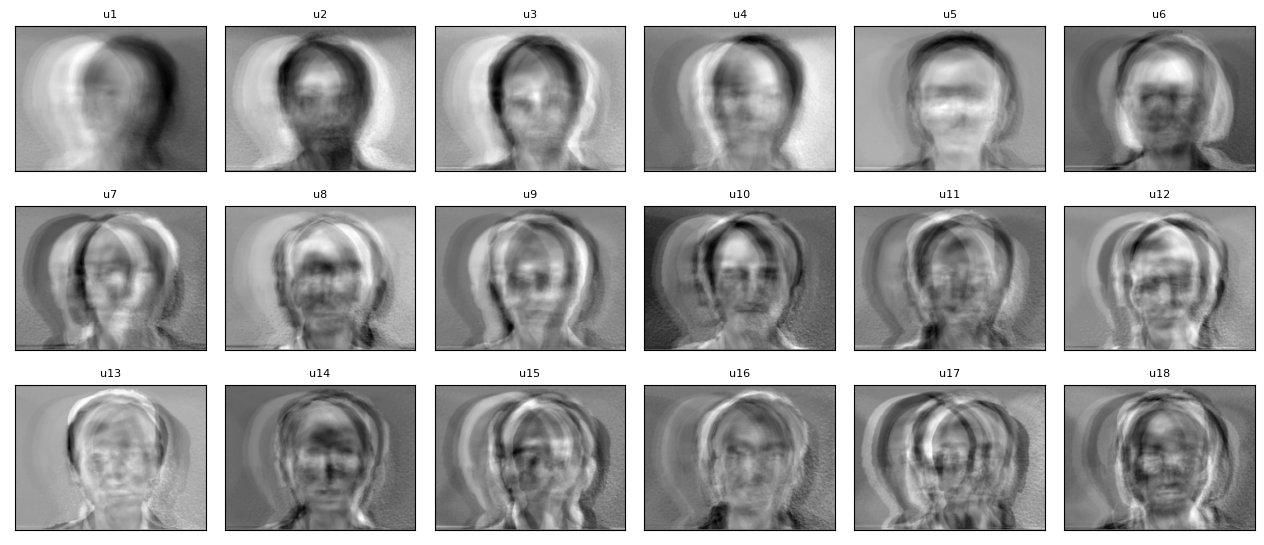

In [47]:
#Plot of "Eigen Faces"
plt.figure(figsize = (16, 7))
for img in range(0, U_base.shape[1]):
    plt.subplot(3, 6, img + 1)
    plt.imshow(vec2img(U_base[:,img]), cmap = "gray")
    plt.title(f"u{img+1}", fontsize = 8)
    plt.xticks([]) 
    plt.yticks([])
    plt.subplots_adjust(wspace = 0.1, hspace = 0.0)

## <a name="Section-82">8.2 Projection of the Database F</a>

In [48]:
F_reduced = U_base.T @ F

# Dimensionality check
print(f"F_reduced : {F_reduced.shape}")

F_reduced : (18, 123)


## <a name="Section-83">8.3 Projection of the Query Set Q</a>

In [49]:
Q_reduced = U_base.T @ Q

# Dimensionality check
print(f"Q_reduced : {Q_reduced.shape}")

Q_reduced : (18, 42)


## <a name="Section-84">8.4 Recognition of the Reduced Q</a>

In [50]:
# starting the monitoring
starting_time = time.time()
tracemalloc.clear_traces()
tracemalloc.start()

recognition(Q_reduced, F_reduced, pictures = False)

# displaying the memory
print(f"\nMaximum Memory Usage (RAM): {tracemalloc.get_traced_memory()[1]/ (1024 * 1024)} MB")
tracemalloc.clear_traces()

print(f'Execution time: {timedelta(seconds = time.time() - starting_time)} [hh:mm:ss]')

Number of Queried Pictures : 42
Number of Matches : 30
Subject Accuracy : 71.43%

Maximum Memory Usage (RAM): 0.06566429138183594 MB
Execution time: 0:00:00.013905 [hh:mm:ss]


### __The new accuracy in the reduced Q set is 71.43%, which represents a decrease in accuracy compared to the unreduced Q set by approximately 12% from 83.33%.__

## <a name="Section-85">8.5 One Face Recognition of the reduced Q</a>

In [51]:
numberImage = 1
onePicture = Q_reduced[:,0:numberImage].reshape(Q_reduced[:,0:numberImage].shape[0], numberImage)

# starting the monitoring
starting_time = time.time()
tracemalloc.clear_traces()
tracemalloc.start()

recognition(onePicture, F_reduced, pictures = False)

# displaying the memory
print(f"\nMaximum Memory Usage (RAM): {tracemalloc.get_traced_memory()[1]/ (1024 * 1024)} MB")
tracemalloc.clear_traces()
print(f'Execution time: {timedelta(seconds = time.time() - starting_time)} [hh:mm:ss]')

Number of Queried Pictures : 1
Number of Matches : 1
Subject Accuracy : 100.0%

Maximum Memory Usage (RAM): 0.06424617767333984 MB
Execution time: 0:00:00.000725 [hh:mm:ss]


## <a name="Section-86">8.6 Accuracy Based on p</a>

In [52]:
P = list(range(1, F.shape[1] + 1))[::-1]
accuracy = []

for p in P:
    U_base = U[:,:p]
    F_reduced = U_base.T @ F
    Q_reduced = U_base.T @ Q
    accuracy.append(recognition(Q_reduced, F_reduced, pictures = False, print_report = False))

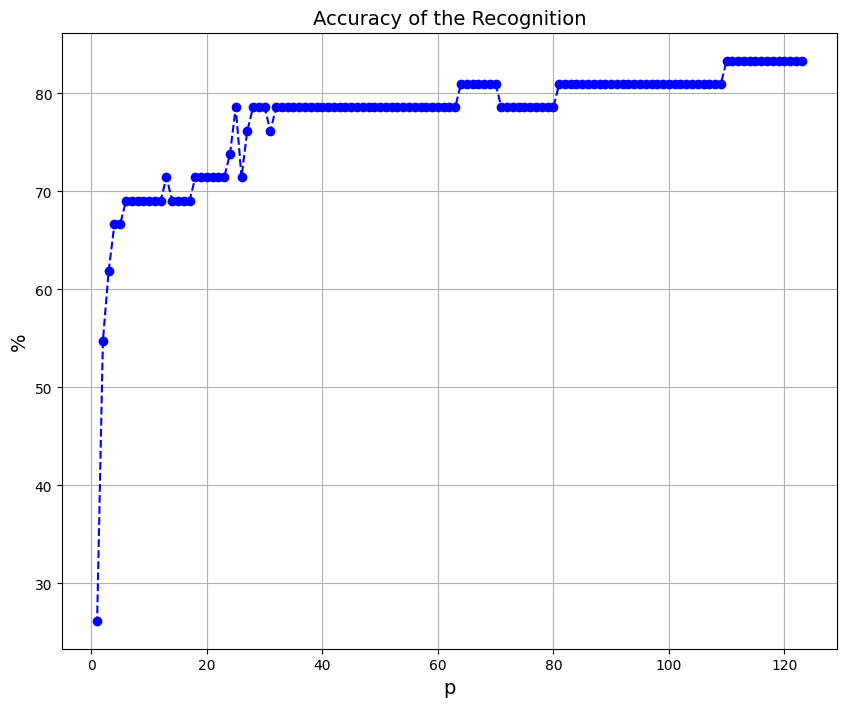

In [53]:
# Plot
plt.figure(figsize = (10, 8))
plt.plot(P, accuracy, 'bo--')
plt.title(f"Accuracy of the Recognition", fontsize = 14)
plt.xlabel('p', fontsize = 14)
plt.ylabel('%', fontsize = 14)
plt.grid()
plt.show()

### __The given graph is based on the change in p from the value 1 to the value 123 (unreduced F). It can be observed that as p changes, so does the accuracy, and in general, it can be said that the higher the p, the higher the accuracy. There are some exceptions to this statement that can be seen in the thesis graph.__

# <a name="Section-9">9 Extra Activities</a>
[top](#Contents)

## <a name="Section-91">9.1 Personal Implementation of SVD</a>

In [54]:
def SVD(A):
    '''
        SVD : Singular Value Decomposition
    '''
    # AᵀA
    AtA = A.T @ A

    # Eigen values and eigenvectors of AᵀA
    S2, V = np.linalg.eig(AtA)

    # Vᵀ
    Vt = V.T

    # Singular values
    S = np.sqrt(S2)

    # U = A V
    U = A @ V

    # Normalization of U
    U = U/ np.linalg.norm(U, 2, axis=0)

    return U, S, Vt

In [55]:
# starting the monitoring
starting_time = time.time()
tracemalloc.clear_traces()
tracemalloc.start()

u, s, vt = SVD(F)

# displaying the memory
print(f"\nMaximum Memory Usage (RAM): {tracemalloc.get_traced_memory()[1]/ (1024 * 1024)} MB")
tracemalloc.clear_traces()
print(f'Execution time: {timedelta(seconds = time.time() - starting_time)} [hh:mm:ss]')


Maximum Memory Usage (RAM): 438.18045711517334 MB
Execution time: 0:00:00.309029 [hh:mm:ss]


In [56]:
# Sanity check on dimensions
print(f"F: {F.shape}")
print(f"u: {u.shape}")
print(f"s: {s.shape}")
print(f"vᵀ: {vt.shape}")
print(f"usvᵀ: {(u @ np.diag(s) @ vt).shape}")

F: (77760, 123)
u: (77760, 123)
s: (123,)
vᵀ: (123, 123)
usvᵀ: (77760, 123)


### __Compared to the SVD of standard libraries such as Numpy or Dask, our SVD implementation with 307 milliseconds is in the middle between the SVD of these libraries. In terms of RAM consumption, it is the worst with 438 MB. From the point of view of the consumption of operating memory, it would be necessary to think about the optimization of the mentioned implementation. One candidate for this implementation can be Randomized Singular Value Decomposition by N. Halko, P. Martinsson, and J. A. Tropp published in 2011.__

## <a name="Section-92">9.2 Average Face of Each Individual in F</a>

In [57]:
# List with names of each individuals
subjectCount = 15
subjectNames = ['subject' + f"{n:02d}" for n in range(1, subjectCount + 1)]
print(*subjectNames, sep=", ")

subject01, subject02, subject03, subject04, subject05, subject06, subject07, subject08, subject09, subject10, subject11, subject12, subject13, subject14, subject15


In [58]:
# Indexes of positions of individual subjects in F
indexesIndividuals = []
for sub in subjectNames:
        indices = [i for i,val in enumerate(F_original_labels_subjects) if val == sub]
        indexesIndividuals.append(indices)

In [59]:
# Create a matrix with an average face for each individual
for idx, invidual in enumerate(indexesIndividuals):

    averageIndividualFace = 0
    for position in invidual:
        averageIndividualFace += F_original[:,position]

    # Average face of one individual
    averageIndividualFace = averageIndividualFace / len(invidual)
    averageIndividualFace = averageIndividualFace.reshape(averageIndividualFace.shape[0], 1)
   
    # Adding to each average face in the matrix
    if idx == 0:
        matrixAverageIndividuals = averageIndividualFace
    else:
        matrixAverageIndividuals = np.concatenate((matrixAverageIndividuals, averageIndividualFace), axis=1)


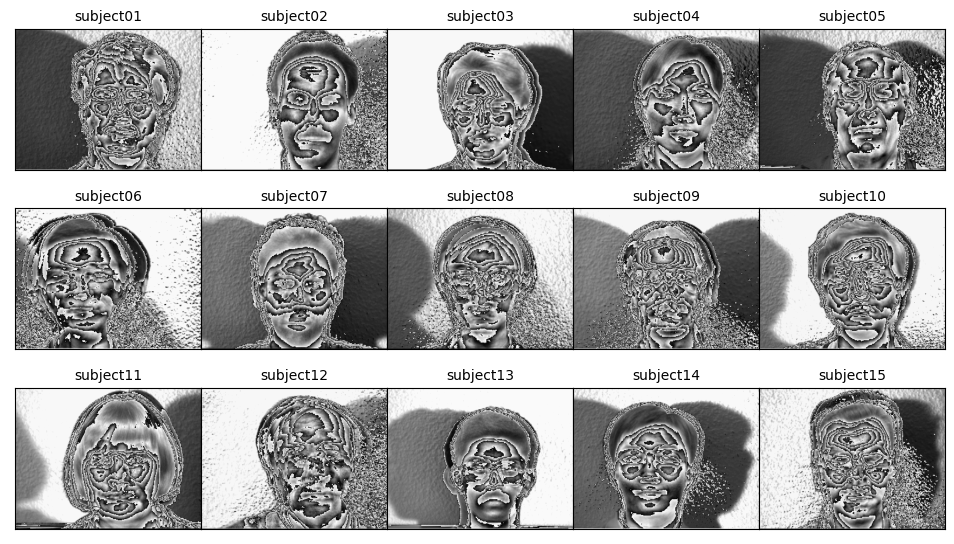

In [60]:
# Plot of the average face for each individual
plt.figure(figsize = (12, 7))
for img in range(0, subjectCount):
    plt.subplot(3, 5, img + 1)
    plt.imshow(vec2img(matrixAverageIndividuals[:,img]), cmap = "gray")
    plt.title(subjectNames[img], fontsize = 10)
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(wspace = 0, hspace = 0.0)

In [61]:
# Database F
F = matrixAverageIndividuals
F_labels = subjectNames

# Query set Q
Q = Q_original
Q_labels = Q_original_labels

In [62]:
# starting the monitoring
starting_time = time.time()
tracemalloc.clear_traces()
tracemalloc.start()

recognition(Q, F, pictures = False)

# displaying the memory
print(f"\nMaximum Memory Usage (RAM): {tracemalloc.get_traced_memory()[1]/ (1024 * 1024)} MB")
tracemalloc.clear_traces()

print(f'Execution time: {timedelta(seconds = time.time() - starting_time)} [hh:mm:ss]')

Number of Queried Pictures : 42
Number of Matches : 5
Subject Accuracy : 11.9%

Maximum Memory Usage (RAM): 17.874337196350098 MB
Execution time: 0:00:00.409075 [hh:mm:ss]


#### __We calculated the average face for each individual from database F. Then we performed recognition. The memory requirement decreased, but the accuracy decreased to 11.9%.__

# <a name="Section-10">10 Conclusion</a>
[top](#Contents)

After investigating multiple methods and cases for SVD computation and recognition of faces in real-time we discovered several findings.

If we only focus on face recognition without SVD, then this is not very suitable for real-time applications. This is because the mentioned 1NN algorithm needs the entire database F for its functionality. Although our database F is not very large, it contains 123 faces, so recognizing faces in set Q takes 3.2 seconds and 146 MB. These time and memory requirements are closely related to the sizes of the sets F and Q. If we increase the ratio between Q and F in favor of F, then the accuracy increases.

In the case when we included SVD, the time and memory requirements of face recognition in the Q set dropped dramatically. Specifically, the memory requirement dropped from 146 MB to 0.07 MB (2386 times less - better) and the time requirement dropped from 3.2 seconds to 0.015 seconds (215 times faster). It is clear from these data that if computing resources are limited for any reason or real-time face recognition is required, then SVD should be involved.

The inclusion of SVD has one major weakness, and that is reduced recognition accuracy. This can be partially compensated by a suitable selection of the parameter p when there is not such a large reduction in accuracy or another recognition algorithm. This algorithm can be a more sophisticated classifier or a deep neural network.

It should not be overlooked that there is a whole range of SVD algorithms out there. We can name, for example, Hestenes' Algorithm, Golub-Kahan Algorithm, Tridiagonalization and Symmetric QR iteration, Tridiagonalization and Divide and Conquer Algorithm, and Bisection and Inverse Iteration. Among the mentioned SVD variants, the Divide and Conquer Method for real-time face recognition shows great promise (Pradhan, 2013).

SVD plays an important role in image recognition and can fundamentally reduce computational requirements thus speeding up the recognition process. This has a crucial role, especially in real-time systems.


# <a name="Section-8">References</a>
[top](#Contents)

* __S. Sharath, S., Murthy K N, B. & S, N. (2011). Dimensionality Reduction Techniques for Face Recognition | IntechOpen. Reviews, Refinements and New Ideas in Face Recognition, 3. 10.5772/18251, Retrieved from: www.intechopen.com/chapters/17174__

* __Large SVDs: https://blog.dask.org/2020/05/13/large-svds__

* __NVIDIA. (n.d.). What is Dask? NVIDIA Data Science Glossary. Retrieved December 22, 2022, from https://www.nvidia.com/en-us/glossary/data-science/dask/__

* __Measuring the allocated memory with tracemalloc: https://stackoverflow.com/questions/70525623/measuring-the-allocated-memory-with-tracemalloc__

* __Randomized Singular Value Decomposition; "Finding structure with randomness: Probabilistic algorithms for constructing approximate matrix decompositions", Nathan Halko, Per-Gunnar Martinsson, Joel A. Tropp, 2011 : https://arxiv.org/abs/0909.4061__

* __Pradhan, T., Routray, A., & Kabi, B. (2013). Comparative Evaluation of Symmetric SVD Algorithms for Real-Time Face and Eye Tracking. Springer Berlin Heidelberg. https://doi.org/10.1007/978-3-642-30232-9_13__